In [2]:
import math,os,glob,h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

(3000000, 26)


/usr/local/bin/start_ipykernel.py:57: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:58: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:59: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:60: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:74: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/bin/start_ipykernel.py:80: RuntimeWarning: divide by zero encountered in power
/usr/local/bin/start_ipykernel.py:83: RuntimeWarning: divide by zero encountered in power


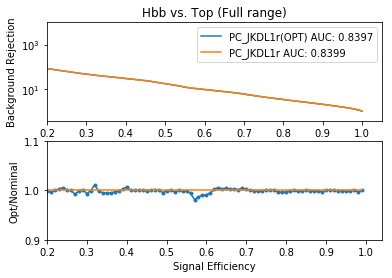

In [14]:
filepath="prediction_WeiAdmStd_PCJKDL1r.h5"
load_file=h5py.File(filepath,'r')

predict=load_file.get("predict")
print predict.shape
predict=np.reshape(predict,(predict.shape[0],predict.shape[1]))
#predict=predict[(predict[:,10]<=138.) & (predict[:,10]>=84.)] #loose
#predict=predict[(predict[:,11]<=500.) & (predict[:,11]>=250.)]
#predict=predict[(predict[:,11]<=1000.) & (predict[:,11]>=500.)]
#predict=predict[predict[:,11]>=1000.]
#predict=predict[predict[:,2]==0]
predict=predict[predict[:,0]==0]
y=predict[:,1]

JKDL1rScoreHiggs=predict[:,15]
#JKDL1rScoreQCD=predict[:,14]
JKDL1rScoreQCD=predict[:,16]
JKDL1r=np.true_divide(JKDL1rScoreHiggs,JKDL1rScoreQCD)
JKDL1r=np.nan_to_num(JKDL1r)

PC_JKDL1rScoreHiggs=predict[:,18]
#PC_JKDL1rScoreQCD=predict[:,17]
PC_JKDL1rScoreQCD=predict[:,19]
PC_JKDL1r=np.true_divide(PC_JKDL1rScoreHiggs,PC_JKDL1rScoreQCD)
PC_JKDL1r=np.nan_to_num(PC_JKDL1r)

#JKFTAG
EFTAGScoreHiggs=predict[:,21]
#EFTAGScoreQCD=predict[:,20]
EFTAGScoreQCD=predict[:,22]
EFTAG=np.true_divide(EFTAGScoreHiggs,EFTAGScoreQCD)
EFTAG=np.nan_to_num(EFTAG)
#JKDL1r
EDL1rScoreHiggs=predict[:,24]
#EDL1rScoreQCD=predict[:,23]
EDL1rScoreQCD=predict[:,25]
EDL1r=np.true_divide(EDL1rScoreHiggs,EDL1rScoreQCD)
EDL1r=np.nan_to_num(EDL1r)

DL1rBaseline=predict[:,13]
w=predict[:,3]
#w=np.full((y.shape[0], ), 1)

JKDL1r_bkg,JKDL1r_signal,JKDL1r_thres=roc_curve(y,JKDL1r,sample_weight=w)
PC_JKDL1r_bkg,PC_JKDL1r_signal,PC_JKDL1r_thres=roc_curve(y,PC_JKDL1r,sample_weight=w)
DL1rBaseline_bkg,DL1rBaseline_signal,DL1rBaseline_thres=roc_curve(y,DL1rBaseline,sample_weight=w)

AUC_JKDL1r=roc_auc_score(y, JKDL1r,sample_weight=w)
AUC_PC_JKDL1r=roc_auc_score(y, PC_JKDL1r,sample_weight=w)
AUC_DL1rBaseline=roc_auc_score(y, DL1rBaseline,sample_weight=w)

EFTAG_bkg,EFTAG_signal,EFTAG_thres=roc_curve(y,EFTAG,sample_weight=w)
AUC_EFTAG=roc_auc_score(y, EFTAG,sample_weight=w)
EDL1r_bkg,EDL1r_signal,EDL1r_thres=roc_curve(y,EDL1r,sample_weight=w)
AUC_EDL1r=roc_auc_score(y, EDL1r,sample_weight=w)

FTAG_info=np.column_stack((PC_JKDL1r_signal,np.power(PC_JKDL1r_bkg,-1.0)))
EFTAG_info=np.column_stack((EFTAG_signal,np.power(EFTAG_bkg,-1.0)))
DL1r_info=np.column_stack((JKDL1r_signal,np.power(JKDL1r_bkg,-1.0)))
EDL1r_info=np.column_stack((EDL1r_signal,np.power(EDL1r_bkg,-1.0)))
eff=[]
ratio=[]
axis=[]
for i in range(100):
    j=i/100.0
    eff.append(j)
    axis.append(1)
    #print j
    #print FTAG_info[abs(FTAG_info[:,0]-j)==abs(FTAG_info[:,0]-j).min()]
    a=FTAG_info[abs(FTAG_info[:,0]-j)==abs(FTAG_info[:,0]-j).min()][0,1]
    b=EFTAG_info[abs(EFTAG_info[:,0]-j)==abs(EFTAG_info[:,0]-j).min()][0,1]
    #a=DL1r_info[abs(DL1r_info[:,0]-j)==abs(DL1r_info[:,0]-j).min()][0,1]
    #b=EDL1r_info[abs(EDL1r_info[:,0]-j)==abs(EDL1r_info[:,0]-j).min()][0,1]
    ratio.append(b/a)
#print eff,ratio
#print FTAG_info.shape,EFTAG_bkg.shape
#print FTAG_bkg[200:210],EFTAG_bkg[200:210]

plt.subplot(2, 1, 1)
plt.plot(EFTAG_signal,np.power(EFTAG_bkg,-1.0),label="PC_JKDL1r(OPT) "+"AUC: "+str(AUC_EFTAG)[0:6])
#plt.plot(EFTAG_signal,np.power(EFTAG_bkg,-1.0),label="JKDL1r(OPT) "+"AUC: "+str(AUC_EFTAG)[0:6])
#plt.plot(JKDL1r_signal,np.power(JKDL1r_bkg,-1.0),label="JKDL1r "+"AUC: "+str(AUC_JKDL1r)[0:6])
plt.plot(PC_JKDL1r_signal,np.power(PC_JKDL1r_bkg,-1.0),label="PC_JKDL1r "+"AUC: "+str(AUC_PC_JKDL1r)[0:6])
#plt.title('Hbb vs. Dijets (Full range)')
#plt.title('Hbb vs. Dijets (Loose mass window)')
#plt.title('Hbb vs. Dijets (pt:[250,500]GeV)')
#plt.title('Hbb vs. Dijets (pt:[500,1000]GeV)')
#plt.title('Hbb vs. Dijets (pt:[1000,3000]GeV)')
plt.title('Hbb vs. Top (Full range)')
#plt.title('Hbb vs. Top (Loose mass window)')
#plt.title('Hbb vs. Top (pt:[250,500]GeV)')
#plt.title('Hbb vs. Top (pt:[500,1000]GeV)')
#plt.title('Hbb vs. Top (pt:[1000,3000]GeV)')
plt.xlabel('Signal Efficiency')
plt.ylabel('Background Rejection')
plt.yscale("log", nonposy="clip")
plt.xlim(left=0.2)
plt.ylim(top=1e5*0.1)
#plt.ylim(bottom=0)
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(eff, ratio, '.-')
plt.plot(eff,axis)
plt.xlim(left=0.2)
plt.ylim(top=1.1)
plt.ylim(bottom=0.9)
plt.xlabel('Signal Efficiency')
plt.ylabel('Opt/Nominal')
ROC_file="figuresPCJKDL1r/"+"OptPCJKDL1r_Top.pdf"
ROC_file1=ROC_file.replace("pdf","jpg")
plt.savefig(ROC_file)
plt.savefig(ROC_file1)